#Importación de Librerías

#### Descomprimimos los archivos

In [1]:
!gdown 1ZV_nCUfuitYz0vpKFhg5wdwz_LlaVQVo
!unzip 'Avengers 1.zip'

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: Avengers 1/captain_america/face_33103_0.png  
  inflating: Avengers 1/captain_america/face_33110_0.png  
  inflating: Avengers 1/captain_america/face_33117_0.png  
  inflating: Avengers 1/captain_america/face_33124_0.png  
  inflating: Avengers 1/captain_america/face_40642_0.png  
  inflating: Avengers 1/captain_america/face_40649_0.png  
  inflating: Avengers 1/captain_america/face_40656_0.png  
  inflating: Avengers 1/captain_america/face_40663_0.png  
  inflating: Avengers 1/captain_america/face_40670_0.png  
  inflating: Avengers 1/captain_america/face_40684_0.png  
  inflating: Avengers 1/captain_america/face_40740_0.png  
  inflating: Avengers 1/captain_america/face_40747_0.png  
  inflating: Avengers 1/captain_america/face_40754_0.png  
  inflating: Avengers 1/captain_america/face_40761_0.png  
  inflating: Avengers 1/captain_america/face_40768_0.png  
  inflating: Avengers 1/captain_america/face_40775_0.p

#### Descargamos las librerías necesarias

 Descargamos la librería para reconocer rostros y crear landmarks

In [2]:
!pip install face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=87d8523bbbfb1769778e96039b7c521f78dc0b1ce82a6d05a165dd9ebb7ee4d3
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


Descargamos la librería que permite analizar e interpretar las predicciones de nuestros modelos

In [3]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283839 sha256=e284d92d0e9806c14b3f4f65b30be2a6f0454851030070e4bf2a6cc6e9434788
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


####Importación de librerías usadas

In [4]:
# Obtener listas de nombres de entradas de un directorio
from os import listdir
# Unir path
from os . path import join

# Librería matemática y random
import math
import random

# Para graficar landmarks
import cv2
from google.colab.patches import cv2_imshow
# Para mostrar plots en formato grilla
import matplotlib.gridspec as gridspec
# Operaciones en arrays
import numpy as np
# Manipulación y análisis de datos
import pandas as pd
# Ploteo
import matplotlib.pyplot as plt
# Mostrar imágenes
from PIL import Image
# Librería para reconocer rostros y crear landmarks
import face_recognition as fr

# Clasificador SVM
from sklearn . svm import SVC
# Clasificador Bayesiano ingenuo
from sklearn . naive_bayes import GaussianNB
# Clasificador de arbol de decision
from sklearn . tree import DecisionTreeClassifier
# Clasificiador Random Foresr
from sklearn.ensemble import RandomForestClassifier
# Obtener la exactitud de los modelos
from sklearn.metrics import accuracy_score, recall_score, mean_squared_error, mean_absolute_error, precision_score, f1_score
# Dividir data en train y test
from sklearn.model_selection import train_test_split
# Clasificador Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
# Clasificador KNN
from sklearn.neighbors import KNeighborsClassifier
# Discretizar valores
from sklearn.preprocessing import LabelEncoder

# Gráficos estadísticos más amigables
import seaborn as sns
# Matriz de confusión
from sklearn.metrics import confusion_matrix

# Analizar e interpretar las predicciones de nuestros modelos
import lime
import lime.lime_tabular

#Actividad 1

Lo primero que haremos es ordenar nuestros datos.

In [5]:
root = "Avengers 1"
directories = listdir ( root )

# Analizamos las clases que tiene nuestro set de datos
print(f"Existen {len(directories)} clases, las cuales son los distintos Avengers:", end=" ")
for x in range(0,len(directories)-1):
  print(directories[x], end=", ")
print(f"y {directories[-1]}.")

print("\n Cada Avenger tiene imagenes asignadas donde:")
# Guardamos todos los path de imagenes de cada avenger respectivo
avengers_directories = {}
for avenger in directories:
  avenger_data = {}
  avenger_images = []
  avenger_root = join(root,avenger)
  images = listdir(avenger_root)
  for image in images:
    image_root = join(avenger_root,image)
    avenger_images.append(image_root)
  avenger_data["images"] = avenger_images
  avengers_directories[avenger] =avenger_data
  print(f"\t {avenger.capitalize()} tiene {len(avenger_images)} imágenes")

Existen 7 clases, las cuales son los distintos Avengers: nick_fury, iron_man, hawkeye, black_widow, hulk, captain_america, y thor.

 Cada Avenger tiene imagenes asignadas donde:
	 Nick_fury tiene 231 imágenes
	 Iron_man tiene 1854 imágenes
	 Hawkeye tiene 378 imágenes
	 Black_widow tiene 1138 imágenes
	 Hulk tiene 976 imágenes
	 Captain_america tiene 1194 imágenes
	 Thor tiene 942 imágenes


Existe una alta diferencia entre los datos, donde Nick Fury por ejemplo solo tiene 231 datos y Iron Man tiene 1854 (8 veces mas). Podríamos esperar que esta diferencia altere nuestros resultados más adelante

Al listar nuestros datos de *Avengers 1* notamos que contiene las rutas a cada avenger, habiendo 7 clases distintas, cada una representando a un Avenger.

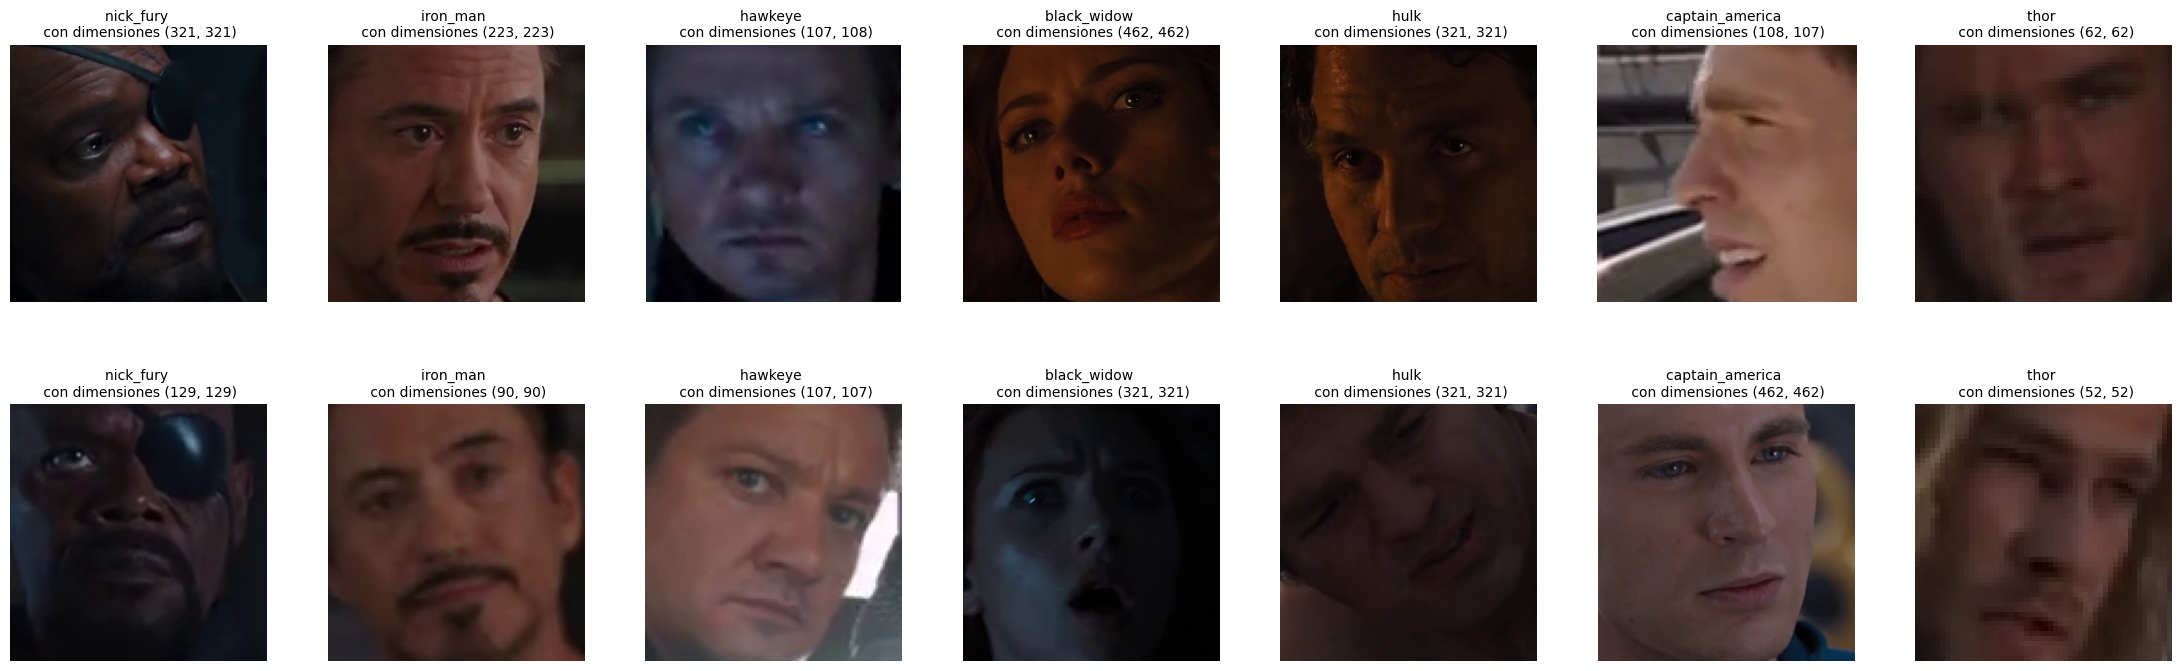

In [6]:
num_rows = 2
num_cols = len(avengers_directories)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(4 * num_cols, 8))

for i, (avenger, data) in enumerate(avengers_directories.items()):
    image_path_1 = data["images"][0]
    image_path_2 = data["images"][6]
    image = Image.open(image_path_1)
    image2 = Image.open(image_path_2)

    ax1 = axes[0, i]
    ax1.imshow(image)
    ax1.set_title(f"{avenger} \n con dimensiones {image.size}", fontsize=10)
    ax1.axis('off')

    ax2 = axes[1, i]
    ax2.imshow(image2)
    ax2.set_title(f"{avenger} \n con dimensiones {image2.size}", fontsize=10)
    ax2.axis('off')

plt.subplots_adjust(wspace=0.2, hspace=0.4)  # Ajustar el espacio entre las subfiguras

plt.show()

Viendo las imágenes observamos que tienen distintas resoluciones, luces, posiciones y calidad. Por lo que podemos decir que nuestros datos serán bien diversos y que se podría ver afectadas nuestras predicciones.

#Actividad 2

Repetimos lo anterior pero ahora extraemos los landmarks y los guardamos

In [7]:
for i, (avenger, data) in enumerate(avengers_directories.items()):
  avenger_landmarks = []
  avenger_root = join(root,avenger)
  landmarks = listdir(avenger_root)
  for landmark in landmarks:
    landmark_root = join(avenger_root,landmark)
    # Cargamos la imagen
    image = fr.load_image_file ( landmark_root )
    # Creamos los landmarks
    landmark = fr.face_landmarks ( image )
    # Guardamos los landmark del avenger correspondiente
    avenger_landmarks.append(landmark)
  # Guardamos los landmarks en un nuevo valor de nuestro diccionario data para su respectivo avenger
  data["landmarks"] = avenger_landmarks

En muchos casos las imagenes no son óptimas en términos de dimensión o calidad por lo que la librería no reconoce los rostros de nuestros avengers, por lo que haremos limpieza de nuestros datos y no consideraremos en nuestro dataset aquellas imagenes sin landmarks (array vacío)

In [8]:
for i, (avenger, data) in enumerate(avengers_directories.items()):
    data["no_landmarks"] = []
    data["found_landmarks"] = []
    for i in range(0,len(data["landmarks"])):
      landmark = data["landmarks"][i]
      # Si la librería retornó un array vacío significa que no reconoció ningún rostro
      if landmark == []:
        # Guardamos los landmarks sin reconocer
        data["no_landmarks"].append([i, landmark])
      else:
        # Guardamos los landmarks encontrados
        data["found_landmarks"].append([i, landmark])

In [9]:
total_not_found = 0
for i, (avenger, data) in enumerate(avengers_directories.items()):
  print(f"{avenger.capitalize()} tiene {len(data['no_landmarks'])} imagenes que no fueron reconocidas.")
  total_not_found += len(data['no_landmarks'])

Nick_fury tiene 169 imagenes que no fueron reconocidas.
Iron_man tiene 402 imagenes que no fueron reconocidas.
Hawkeye tiene 149 imagenes que no fueron reconocidas.
Black_widow tiene 398 imagenes que no fueron reconocidas.
Hulk tiene 287 imagenes que no fueron reconocidas.
Captain_america tiene 427 imagenes que no fueron reconocidas.
Thor tiene 216 imagenes que no fueron reconocidas.


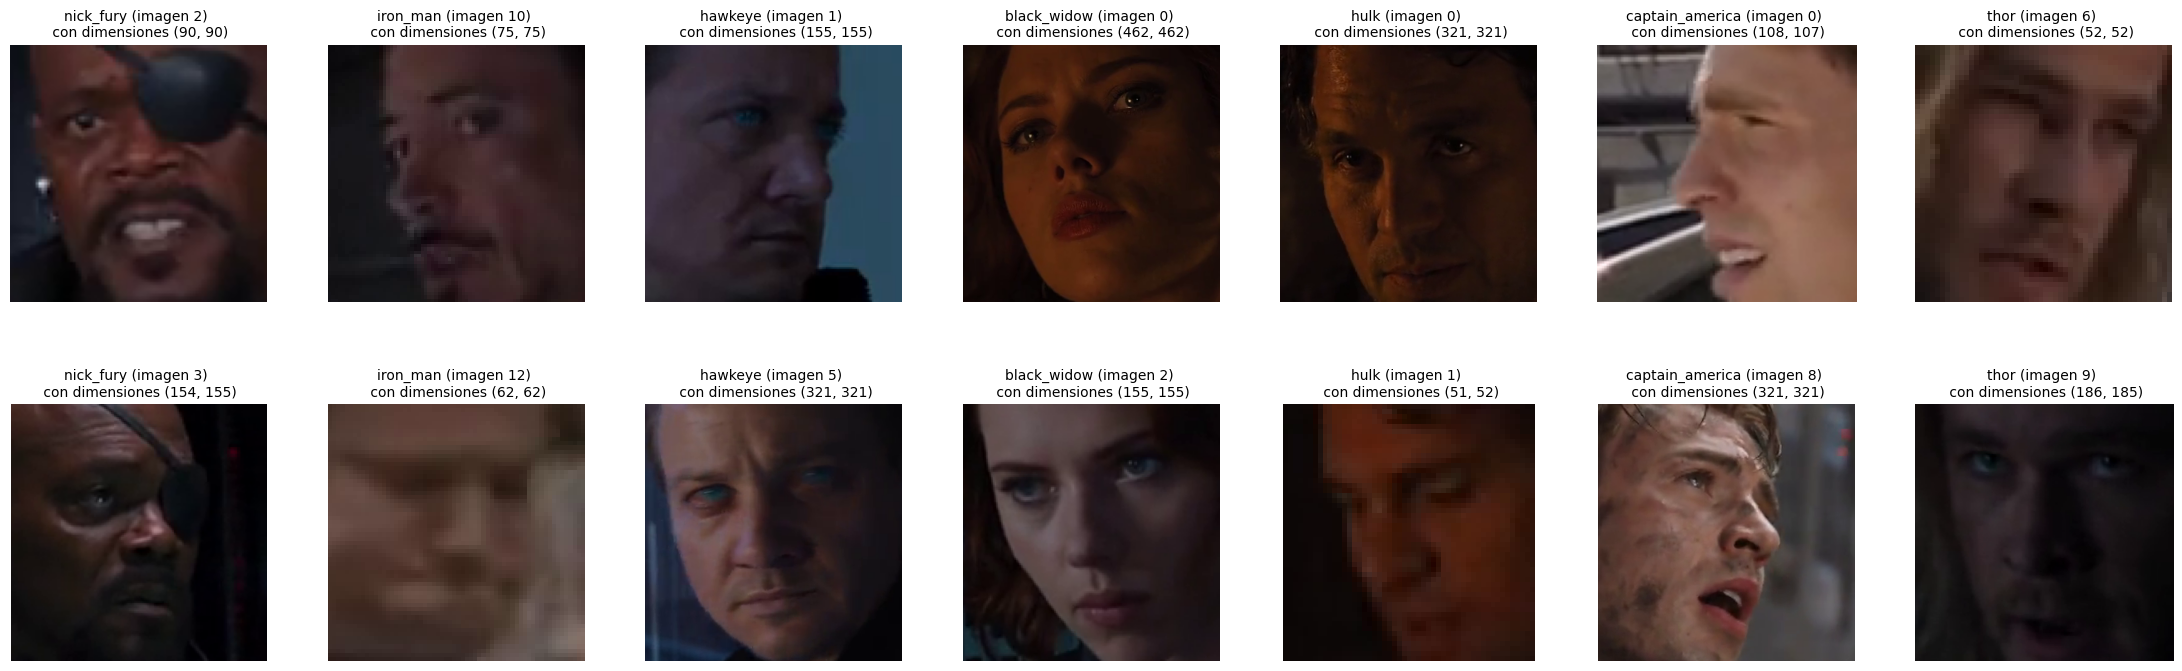

In [10]:
num_rows = 2
num_cols = len(avengers_directories)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(4 * num_cols, 8))

for i, (avenger, data) in enumerate(avengers_directories.items()):
    image1_index = data["no_landmarks"][0][0]
    image2_index = data["no_landmarks"][1][0]
    image_path_1 = data["images"][image1_index]
    image_path_2 = data["images"][image2_index]
    image = Image.open(image_path_1)
    image2 = Image.open(image_path_2)

    ax1 = axes[0, i]
    ax1.imshow(image)
    ax1.set_title(f"{avenger} (imagen {image1_index}) \n con dimensiones {image.size}", fontsize=10)
    ax1.axis('off')

    ax2 = axes[1, i]
    ax2.imshow(image2)
    ax2.set_title(f"{avenger} (imagen {image2_index}) \n con dimensiones {image2.size}", fontsize=10)
    ax2.axis('off')

plt.subplots_adjust(wspace=0.2, hspace=0.4)  # Ajustar el espacio entre las subfiguras

plt.show()

Viendo las imagenes podemos ver que la luz, la resolución y la posición del rostro pudieron haber sido factores para que no se reconocieran landmarks

In [11]:
total_images = 0
for i, (avenger, data) in enumerate(avengers_directories.items()):
  total_images += len(data['images'])
  print(f"{avenger.capitalize()} tiene {len(data['found_landmarks'])} (antes {len(data['images'])}) imagenes que fueron reconocidas.")

Nick_fury tiene 62 (antes 231) imagenes que fueron reconocidas.
Iron_man tiene 1452 (antes 1854) imagenes que fueron reconocidas.
Hawkeye tiene 229 (antes 378) imagenes que fueron reconocidas.
Black_widow tiene 740 (antes 1138) imagenes que fueron reconocidas.
Hulk tiene 689 (antes 976) imagenes que fueron reconocidas.
Captain_america tiene 767 (antes 1194) imagenes que fueron reconocidas.
Thor tiene 726 (antes 942) imagenes que fueron reconocidas.


In [12]:
print(f"En total hubieron {total_not_found} imagenes de {total_images} que no fueron reconocidas ({int(round(total_not_found/total_images,2)*100)}%)")

En total hubieron 2048 imagenes de 6713 que no fueron reconocidas (31%)


Hubieron muchas imagenes que no fueron reconocidas lo que significa una gran pérdida de información ya que como nuestros modelos se basarán en features obtenidas a partir de los landmarks no tiene sentido en trabajar en imagenes donde no existen.

Observamos como se ven los landmarks reconocidos

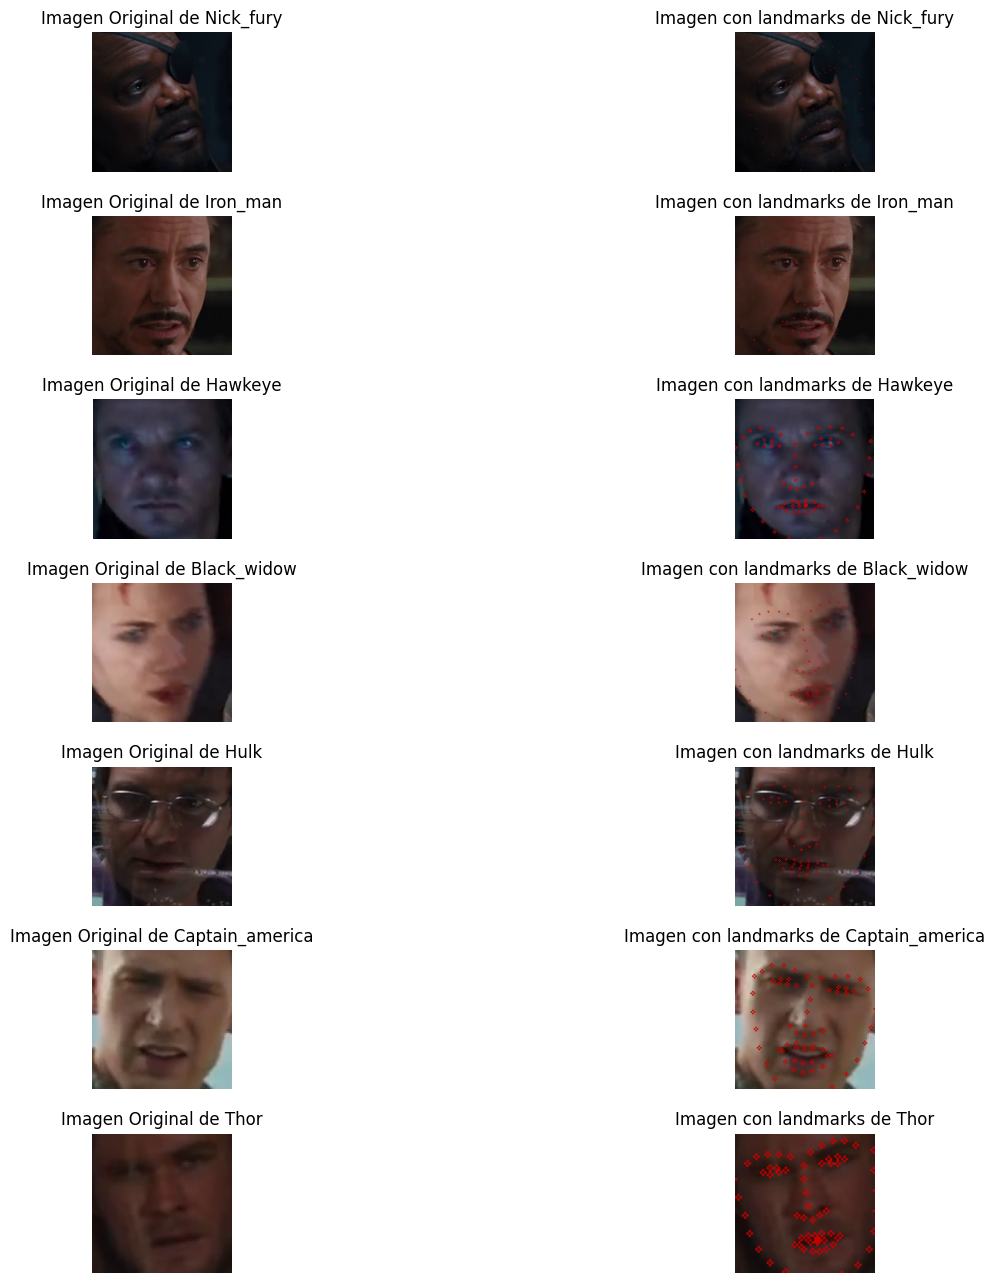

In [13]:
# Configurar la cuadrícula de subtramas
num_rows = len(avengers_directories)
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(13, 13))
fig.tight_layout()

# Mostrar las imágenes en la cuadrícula
for i, (avenger, data) in enumerate(avengers_directories.items()):
    first_found = data['found_landmarks'][0]
    landmark = first_found[1]
    image_path = data["images"][first_found[0]]
    image = cv2.imread(image_path)
    original_image = image.copy()

    for face_part, pos in landmark[0].items():
        for (x, y) in pos:
            cv2.circle(image, (x, y), 1, (0, 0, 200))

    row = i
    col_original = 0
    col_processed = 1

    ax_original = axes[row, col_original]
    ax_original.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    ax_original.set_title(f"Imagen Original de {avenger.capitalize()}", fontsize=12)
    ax_original.axis('off')

    ax_processed = axes[row, col_processed]
    ax_processed.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax_processed.set_title(f"Imagen con landmarks de {avenger.capitalize()}", fontsize=12)
    ax_processed.axis('off')

plt.subplots_adjust()
plt.show()

Analizando las imagenes vemos que los landmarks tampoco son lo más preciso y muchas veces la librería falló en determinar bien las coordenadas de los rasgos del rostro.

#Actividad 3

Las características que implementaré son las siguientes:
1. Proporción entre la distancia entre los ojos y el ancho de la cara
2. Proporción entre el ancho de la nariz y el ancho de la cara
3. Relación entre la altura y el ancho de los ojos
4. Relación entre el ancho y largo de la cara
5. Largo de la boca
6. Distancia entre la nariz y la boca
7. Proporción entre el largo de la ceja izquierda y el ancho de la cara
7. Proporción entre el largo de la ceja derecha y el ancho de la cara
9. Grosor de los labios
10. Distancia entre las cejas


A continuación un detalle de por qué elegí estas características:


1. **Proporción entre la distancia entre los ojos y el ancho de la cara:** La distancia entre los ojos es una medida importante en cuanto a reconocimiento facial. Esta característica puede contribuir a la forma y estructura general del rostro y puede ser útil para distinguir diferentes tipos de rostros ya que no es igual para todos los individuos.
2. **Proporción entre el ancho de la nariz y el ancho de la cara:**  El ancho de la nariz varía considerablemente entre diferentes individuos. Algunas personas pueden tener narices más anchas, mientras que otras pueden tener narices más estrechas. Esta variabilidad puede ser una característica distintiva que ayuda a diferenciar entre diferentes tipos de rostros.
3. **Relación entre la altura y el ancho de los ojos:** La relación entre la altura y el ancho de los ojos puede influir en la forma general y la estructura facial. Por ejemplo, si los ojos tienen una mayor altura en comparación con su ancho, esto puede contribuir a una apariencia más alargada o estrecha del rostro. Por otro lado, si los ojos tienen una mayor anchura en relación con su altura, esto puede dar lugar a un aspecto más redondeado o ancho del rostro. Esto indica que es una buena característica que diferencia distintos tipos de rostros
4. **Relación entre el ancho y largo de la cara:** La relación entre el ancho y el largo de la cara es un indicador importante de las proporciones faciales. En muchos rostros, el ancho y el largo de la cara están relacionados de una manera que refleja la estructura facial única de cada individuo. Analizar esta relación puede ayudar a identificar y distinguir diferentes tipos de rostros.
5. **Relación largo de la boca y largo de la cara:** La longitud de la boca puede variar significativamente en diferentes individuos y puede influir en la apariencia general de la expresión facial. Una boca más larga puede transmitir una expresión de seriedad o determinación, mientras que una boca más corta puede sugerir una apariencia más juvenil o juguetona. Analizar la longitud de la boca puede ayudar a distinguir entre diferentes tipos de expresiones faciales y capturar características únicas de cada individuo.Esto combinado con otras features puede ayudar al modelo a predecir de mejor forma rostros a otros considerando emocionalidad
6. **Distancia entre la nariz y la boca:** Esta característica refleja la proporción y la estructura facial de cada individuo. Esta distancia puede influir en la apariencia general de la cara y puede variar ampliamente entre diferentes personas. Analizar esta característica puede ayudar a distinguir y clasificar diferentes tipos de rostros, y capturar detalles únicos de la relación espacial entre la nariz y la boca.
7. **Proporción entre el largo de la ceja izquierda y el ancho de la cara:**
El largo de las cejas puede ser una buena característica para clasificar rostros debido a que influye en la expresión y el marco facial. Las cejas más largas pueden dar la ilusión de ojos más grandes y expresivos, mientras que las cejas más cortas pueden dar una apariencia más suave. Además, el largo de las cejas puede variar según la forma y estructura facial de cada individuo, lo que permite distinguir diferentes tipos de rostros. Al analizar esta característica, se pueden capturar detalles únicos de las cejas y utilizarla para identificar patrones y clasificar rostros de manera más precisa.
8. **Proporción entre el largo de la ceja derecha y el ancho de la cara:**
Debido a la distintas posiciones en las que se puede encontrar la persona es importante considerar dos características distintas para cada ceja de manera de tener datos más precisos.
9. **Proporción grosor de los labios y largo del rostro:** El grosor de los labios puede ser una buena característica para clasificar rostros debido a su impacto en la apariencia facial y la expresión. Analizar el grosor de los labios puede ayudar a distinguir entre labios más delgados y más voluminosos, y capturar características únicas de cada individuo, lo que lo convierte en un elemento diferenciador en la clasificación facial y el reconocimiento de rostros.
10. **Proporción distancia entre las cejas y ancho de la cara:** La distancia entre las cejas puede ser una buena característica para la clasificación facial debido a que refleja la posición relativa y la separación de las cejas en el rostro. Esta medida puede variar considerablemente entre los individuos y capturar diferencias en la forma y la estructura de las cejas. La distancia entre las cejas puede influir en la apariencia general de la frente y los ojos, y puede ser un rasgo distintivo y reconocible en cada persona.

Vale destacar que de manera de disminuir el error por distintas posiciones o resoluciones en las imagenes los datos siempre seran proporciones o relaciones, así estandarizamos las distancias.

Todos los puntos fueron asegurados revisando los landmarks e imagenes y encontrando los patrones para saber que representaba cada punto en cada rasgo del rostro

### Cálculo de la *proporción entre la distancia entre los ojos y el ancho de la cara*

In [14]:
for i, (avenger, data) in enumerate(avengers_directories.items()):
  landmarks = data['found_landmarks']
  proportions = []
  for landmark in landmarks:
    pos = landmark[0]
    points = landmark[1][0]
    left_eye = points['left_eye']
    right_eye = points['right_eye']
    chin = points['chin']
    #Calculamos distancia entre los ojos
    eye_distance = math.sqrt((left_eye[3][0] - right_eye[0][0]) ** 2 + (left_eye[3][1] - right_eye[0][1]) ** 2)
    # Calculamos ancho de la cara
    face_width = chin[-1][0] - chin[0][0]
    #Proporción
    proportion = eye_distance / face_width

    proportions.append([pos,proportion])

  data['eye_distance'] = proportions

###Cálculo de la *proporción entre el ancho de la nariz y el ancho de la cara*

In [15]:
for i, (avenger, data) in enumerate(avengers_directories.items()):
  landmarks = data['found_landmarks']
  proportions = []
  for landmark in landmarks:
    pos = landmark[0]
    points = landmark[1][0]
    nose_tip = points['nose_tip']
    chin = points['chin']
    #Calculamos ancho de la nariz
    nose_width = nose_tip[-1][0] - nose_tip[0][0]
    # Calculamos ancho de la cara
    face_width = chin[-1][0] - chin[0][0]
    #Proporción
    proportion = nose_width / face_width

    proportions.append([pos,proportion])

  data['nose_width'] = proportions

###Cálculo de la *relación entre la altura y el ancho de los ojos*

In [16]:
for i, (avenger, data) in enumerate(avengers_directories.items()):
  landmarks = data['found_landmarks']
  ratios = []
  for landmark in landmarks:
    pos = landmark[0]
    points = landmark[1][0]
    left_eye = points['left_eye']
    right_eye = points['right_eye']
    #Calculamos altura de los ojos
    left_eye_height = abs(left_eye[0][1] - left_eye[-1][1])
    right_eye_height = abs(right_eye[0][1] - right_eye[-1][1])
    # Calculamos ancho de los ojos
    left_eye_width = abs(left_eye[0][0] - left_eye[-1][0])
    right_eye_width = abs(right_eye[0][0] - right_eye[-1][0])

    #Relación
    if(left_eye_width > 0):
      left_eye_ratio = left_eye_height / left_eye_width
    else:
      left_eye_ratio = 0
    if(right_eye_width > 0):
      right_eye_ratio = right_eye_height / right_eye_width
    else:
      right_eye_ratio = 0

    #Promediamos
    average_ratio = (left_eye_ratio + right_eye_ratio)/2

    ratios.append([pos,average_ratio])

  data['eyes_ratio'] = ratios

###Cálculo de la *relación entre el ancho y largo de la cara*

In [17]:
for i, (avenger, data) in enumerate(avengers_directories.items()):
  landmarks = data['found_landmarks']
  ratios = []
  for landmark in landmarks:
    pos = landmark[0]
    points = landmark[1][0]
    chin = points['chin']
    #Calculamos altura de la cara
    vertical_length = chin[8][1] - chin[0][1]
    # Calculamos ancho de la cara
    horizontal_length = chin[-1][0] - chin[0][0]
    # Calculamos relación entre el ancho y largo de la cara
    ratio = horizontal_length / vertical_length

    ratios.append([pos,ratio])

  data['face_ratio'] = ratios

###Calcular *de la relación entre el largo y ancho de la boca*

In [18]:
for i, (avenger, data) in enumerate(avengers_directories.items()):
  landmarks = data['found_landmarks']
  ratios = []
  for landmark in landmarks:
    pos = landmark[0]
    points = landmark[1][0]
    bottom_lip = points['bottom_lip']
    top_lip = points['top_lip']
    # Expresamos los datos en listas
    bottom_lip_x = [point[0] for point in bottom_lip]
    bottom_lip_y = [point[1] for point in bottom_lip]
    top_lip_y = [point[1] for point in top_lip]
    #Calculamos largo de la boca
    mouth_length = max(bottom_lip_x) - min(bottom_lip_x)
    # Calculamos ancho de la cara
    mouth_width = max(bottom_lip_y) - min(top_lip_y)
    # Calculamos relación entre el ancho y largo de la boca
    ratio = mouth_length / mouth_width

    ratios.append([pos,ratio])

  data['mouth_ratio'] = ratios

###Cálculo de la *distancia entre la nariz y la boca*

In [19]:
for i, (avenger, data) in enumerate(avengers_directories.items()):
  landmarks = data['found_landmarks']
  proportions = []
  for landmark in landmarks:
    pos = landmark[0]
    points = landmark[1][0]
    nose_tip = points['nose_tip']
    top_lip = points['top_lip']
    chin = points['chin']
    # Expresamos los datos en listas
    coords_nose = [point[1] for point in nose_tip]
    coords_lip = [point[1] for point in top_lip]
    #Calculamos distancia entre labio y nariz
    distance_lip_nose = min(coords_lip) - max(coords_nose)

    # Calculamos el ancho de la cara
    face_width = chin[-1][0] - chin[0][0]
    #Lo relacionamos al ancho de la cara
    proportion = distance_lip_nose / face_width

    proportions.append([pos,proportion])

  data['distance_lip_nose'] = proportions

###Cálculo de la *proporción entre el largo de las ceja izquierda y el ancho de la cara*



In [20]:
for i, (avenger, data) in enumerate(avengers_directories.items()):
  landmarks = data['found_landmarks']
  proportions = []
  for landmark in landmarks:
    pos = landmark[0]
    points = landmark[1][0]
    left_eyebrow = points['left_eyebrow']
    right_eyebrow = points['right_eyebrow']
    chin = points['chin']
    #Calculamos distancia entre labio y nariz
    distance_left_eyebrow = left_eyebrow[-1][0] - left_eyebrow[0][0]

    # Calculamos el ancho de la cara
    face_width = chin[-1][0] - chin[0][0]
    #Lo relacionamos al ancho de la cara
    proportion = distance_left_eyebrow / face_width

    proportions.append([pos,proportion])

  data['left_eyebrow_length'] = proportions

###Cálculo de la *proporción entre el largo de las ceja derecha y el ancho de la cara*



In [21]:
for i, (avenger, data) in enumerate(avengers_directories.items()):
  landmarks = data['found_landmarks']
  proportions = []
  for landmark in landmarks:
    pos = landmark[0]
    points = landmark[1][0]
    right_eyebrow = points['right_eyebrow']
    chin = points['chin']
    #Calculamos largo de la ceja
    distance_right_eyebrow = right_eyebrow[-1][0] - right_eyebrow[0][0]

    # Calculamos el ancho de la cara
    face_width = chin[-1][0] - chin[0][0]
    #Lo relacionamos al ancho de la cara
    proportion = distance_right_eyebrow / face_width

    proportions.append([pos,proportion])

  data['right_eyebrow_length'] = proportions

###Cálculo del *grosor de los labios*

In [22]:
for i, (avenger, data) in enumerate(avengers_directories.items()):
  landmarks = data['found_landmarks']
  proportions = []
  for landmark in landmarks:
    pos = landmark[0]
    points = landmark[1][0]
    top_lip = points['top_lip']
    bottom_lip = points['bottom_lip']
    chin = points['chin']
    # Expresamos los datos en listas
    coords_bottom_lip = [point[1] for point in bottom_lip]
    coords_top_lip = [point[1] for point in top_lip]
    #Calculamos grosor
    lips_width = max(coords_bottom_lip) - min(coords_top_lip)

    # Calculamos el largo de la cara
    face_length = chin[8][1] - chin[0][1]
    #Lo relacionamos al largo de la cara
    proportion = lips_width / face_length

    proportions.append([pos, proportion])

  data['lips_width'] = proportions

###Cálculo de la *distancia entre las cejas*

In [23]:
for i, (avenger, data) in enumerate(avengers_directories.items()):
  landmarks = data['found_landmarks']
  proportions = []
  for landmark in landmarks:
    pos = landmark[0]
    points = landmark[1][0]
    left_eyebrow = points['left_eyebrow']
    right_eyebrow = points['right_eyebrow']
    chin = points['chin']
    # Expresamos los datos en listas
    coords_left_eyebrow = [point[0] for point in left_eyebrow]
    coords_right_eyebrow = [point[0] for point in right_eyebrow]
    #Calculamos grosor
    eyebrows_distance =  min(coords_right_eyebrow) - max(coords_left_eyebrow)

    # Calculamos el ancho de la cara
    face_width = chin[-1][0] - chin[0][0]
    #Lo relacionamos al largo de la cara
    proportion = eyebrows_distance / face_width

    proportions.append([pos,proportion])

  data['eyebrows_distance'] = proportions

#Actividad 4

Pasaremos nuestros datos a un array numpy para poder manipularlos y trabajarlos en nuestros modelos

In [24]:
data = []
eye_distance = []
nose_width = []
eyes_ratio = []
face_ratio = []
mouth_ratio = []
distance_lip_nose = []
left_eyebrow_length = []
eyebrows_distance = []
right_eyebrow_length = []
lips_width = []
avenger_list = []

# Recorrer los Avengers y sus diccionarios correspondientes
for avenger, avenger_data in avengers_directories.items():
    for data_point in avenger_data['eye_distance']:
        eye_distance.append(data_point[1])
        avenger_list.append(avenger)
    for data_point in avenger_data['nose_width']:
        nose_width.append(data_point[1])
    for data_point in avenger_data['eyes_ratio']:
        eyes_ratio.append(data_point[1])
    for data_point in avenger_data['face_ratio']:
        face_ratio.append(data_point[1])
    for data_point in avenger_data['mouth_ratio']:
        mouth_ratio.append(data_point[1])
    for data_point in avenger_data['distance_lip_nose']:
        distance_lip_nose.append(data_point[1])
    for data_point in avenger_data['left_eyebrow_length']:
        left_eyebrow_length.append(data_point[1])
    for data_point in avenger_data['eyebrows_distance']:
        eyebrows_distance.append(data_point[1])
    for data_point in avenger_data['right_eyebrow_length']:
        right_eyebrow_length.append(data_point[1])
    for data_point in avenger_data['lips_width']:
        lips_width.append(data_point[1])

data.append(avenger_list)
data.append(eye_distance)
data.append(nose_width)
data.append(eyes_ratio)
data.append(face_ratio)
data.append(mouth_ratio)
data.append(distance_lip_nose)
data.append(left_eyebrow_length)
data.append(right_eyebrow_length)
data.append(lips_width)
data.append(eyebrows_distance)

# Crear el array de NumPy a partir de la lista de datos
data_array = np.array(data)
data_array = np.transpose(data_array)

df = pd.DataFrame(data_array)
df.columns = ['avenger', 'eye_distance', 'nose_width', 'eyes_ratio', 'face_ratio',
              'mouth_ratio', 'distance_lip_nose', 'left_eyebrow_length',
              'right_eyebrow_length', 'lips_width', 'eyebrows_distance']

# Imprimir la columna 'avenger' del DataFrame
df.head()


avenger         eye_distance           nose_width           eyes_ratio  \
0  nick_fury  0.28453786476196663  0.25630252100840334  0.14358974358974358   
1  nick_fury   0.2885731904822315  0.24369747899159663  0.06904761904761905   
2  nick_fury   0.2641509433962264  0.27169811320754716   0.2565359477124183   
3  nick_fury   0.2439096643365925   0.2072072072072072  0.15476190476190477   
4  nick_fury   0.3144660377352201  0.23333333333333334                 0.75   

           face_ratio         mouth_ratio    distance_lip_nose  \
0  1.4691358024691359  1.6545454545454545  0.10504201680672269   
1  1.4424242424242424  1.6727272727272726  0.10504201680672269   
2  1.1422413793103448  1.8846153846153846   0.1169811320754717   
3  1.5633802816901408              2.6875  0.06306306306306306   
4   0.967741935483871               1.375                  0.0   

   left_eyebrow_length right_eyebrow_length           lips_width  \
0   0.3487394957983193   0.2857142857142857   0.3395061728395062   
1   0.3487394957983193  0.29411764705882354   0.3333333333333333   
2  0.39622641509433965  0.24150943396226415  0.22413793103448276   
3  0.27927927927927926  0.36036036036036034  0.22535211267605634   
4  0.43333333333333335                  0.2  0.25806451612903225   

     eyebrows_distance  
0  0.13025210084033614  
1  0.14285714285714285  
2   0.1471698113207547  
3  0.12612612612612611  
4  0.13333333333333333

In [25]:
# Dividimos features y nuestra columna de predicción y clasificación
y = df['avenger']
X = df. loc[:, df. columns != "avenger"]

Para dividir nuestros datos debemos considerar lo siguiente:
1. Al dividir los datos en un conjunto de entrenamiento y un conjunto de prueba, es importante tener suficientes datos para entrenar el modelo de manera efectiva y, al mismo tiempo, disponer de una muestra lo suficientemente grande para evaluar la precisión del modelo en el conjunto de prueba.
2. Un tamaño de prueba más grande puede ayudar a evaluar mejor la capacidad del modelo para generalizar y evitar el sobreajuste (overfitting). Si el modelo se ajusta demasiado a los datos de entrenamiento, es probable que no funcione bien en datos nuevos y desconocidos. Un conjunto de prueba más grande proporciona una evaluación más confiable del rendimiento del modelo en datos no vistos.
3. El uso de un test size de 0.3 se ha convertido en una convención común y una práctica recomendada en muchos casos. Esto se debe a que ha demostrado ser un punto de partida razonable y confiable en la mayoría de las situaciones.

In [26]:
# Dividimos nuestros datos en test y train
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)

## Decision Tree

In [27]:
# Creamos la instancia de un árbol de decisión
clf = DecisionTreeClassifier(max_depth=10, criterion='entropy')
# Entrenar el modelo utilizando los datos de entrenamiento
clf = clf.fit(X_train, y_train)

In [28]:
# Realizar predicciones en el conjunto de prueba
y_pred_tree = clf.predict(X_test)
print(f"Rendimiento del modelo con Decision Tree: {round(accuracy_score(y_test, y_pred_tree), 2)}")

Rendimiento del modelo con Decision Tree: 0.49


## Random Forest

In [29]:
# Creamos la instancia de un Random Forest
rfc= RandomForestClassifier(criterion='entropy')
# Entrenar el modelo utilizando los datos de entrenamiento
rfc = rfc.fit(X_train, y_train)
# Realizar predicciones en el conjunto de prueba
y_pred_forest = rfc.predict(X_test)
print(f"Rendimiento del modelo con Random Forest: {round(accuracy_score(y_test, y_pred_forest),2)}")

Rendimiento del modelo con Random Forest: 0.63


## Gradient Boosting

In [30]:
# Crear una instancia del codificador de etiquetas
label_encoder = LabelEncoder()

# Codificar la columna de nombres en y_train y y_test
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)

In [31]:
# Creamos la instancia de un Gradient Boosting
reg = GradientBoostingRegressor(random_state=0, n_estimators=400)
# Entrenar el modelo utilizando los datos de entrenamiento
reg.fit(X_train, y_train_encoded)
# Realizar predicciones en el conjunto de prueba
y_pred_gradient = reg.predict(X_test)
score_gradient = reg.score(X_test, y_test_encoded)

print(f"Nivel de ajuste del modelo con Gradient Boosting: {round(score_gradient,2)}")

Nivel de ajuste del modelo con Gradient Boosting: 0.39


##KNN

In [32]:
# Crear una instancia del clasificador KNN
knn = KNeighborsClassifier(n_neighbors=7)
# Entrenar el modelo utilizando los datos de entrenamiento
knn.fit(X_train, y_train)
# Realizar predicciones en el conjunto de prueba
y_pred_knn = knn.predict(X_test)
# Calcular rendimiento del modelo
print("Rendimiento del modelo con KNN: ", round(accuracy_score(y_test, y_pred_knn),2))

Rendimiento del modelo con KNN:  0.43


##SVM

In [33]:
# Crear una instancia de SVC con kernel lineal
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

# Crear una instancia de SVC con kernel RBF (Radial Basis Function)
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)

# Crear una instancia de SVC con kernel polinomial
svm_poly = SVC(kernel='poly',degree=10)
svm_poly.fit(X_train, y_train)

# Realizar predicciones en los conjuntos de prueba
y_pred_linear = svm_linear.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)
y_pred_poly = svm_poly.predict(X_test)

print(f"Rendimiento de SVM con kernel polinomial: {round(accuracy_score(y_test, y_pred_poly),2)}")
print(f"Rendimiento de SVM con kernel lineal: {round(accuracy_score(y_test, y_pred_linear),2)}")
print(f"Rendimiento de SVM con kernel RBF : {round(accuracy_score(y_test, y_pred_rbf),2)}")

Rendimiento de SVM con kernel polinomial: 0.47
Rendimiento de SVM con kernel lineal: 0.41
Rendimiento de SVM con kernel RBF : 0.38


## Resumen

El rendimiento es una métrica que mide la proporción de muestras correctamente clasificadas sobre el total de muestras.

In [34]:
print(f"Rendimiento del modelo con Random Forest:        {round(accuracy_score(y_test, y_pred_forest),2)}")
print(f"Rendimiento del modelo con Decision Tree:        {round(accuracy_score(y_test, y_pred_tree),2)}")
print(f"Rendimiento de SVM con kernel polinomial:        {round(accuracy_score(y_test, y_pred_poly),2)}")
print(f"Rendimiento del modelo con KNN:                  {round(accuracy_score(y_test, y_pred_knn),2)}")
print(f"Rendimiento de SVM con kernel lineal:            {round(accuracy_score(y_test, y_pred_linear),2)}")
print(f"Rendimiento de SVM con kernel RBF:               {round(accuracy_score(y_test, y_pred_rbf),2)}")

Rendimiento del modelo con Random Forest:        0.63
Rendimiento del modelo con Decision Tree:        0.49
Rendimiento de SVM con kernel polinomial:        0.47
Rendimiento del modelo con KNN:                  0.43
Rendimiento de SVM con kernel lineal:            0.41
Rendimiento de SVM con kernel RBF:               0.38


La sensibilidad (recall) es la proporción tp / (tp + fn), donde tp es el número de verdaderos positivos y fn es el número de falsos negativos. La sensibilidad representa, de manera intuitiva, la capacidad del clasificador para encontrar todas las muestras positivas.

In [35]:
print(f"Recall del modelo con Random Forest:        {round(recall_score(y_test, y_pred_forest, average='macro'),2)}")
print(f"Recall del modelo con Decision Tree:        {round(recall_score(y_test, y_pred_tree, average='macro'),2)}")
print(f"Recall de SVM con kernel polinomial:        {round(recall_score(y_test, y_pred_poly, average='macro'),2)}")
print(f"Recall del modelo con KNN:                  {round(recall_score(y_test, y_pred_knn, average='macro'),2)}")
print(f"Recall de SVM con kernel lineal:            {round(recall_score(y_test, y_pred_linear, average='macro'),2)}")
print(f"Recall de SVM con kernel RBF:               {round(recall_score(y_test, y_pred_rbf, average='macro'),2)}")

Recall del modelo con Random Forest:        0.54
Recall del modelo con Decision Tree:        0.42
Recall de SVM con kernel polinomial:        0.33
Recall del modelo con KNN:                  0.33
Recall de SVM con kernel lineal:            0.24
Recall de SVM con kernel RBF:               0.22


La precisión es la proporción tp / (tp + fp), donde tp es el número de verdaderos positivos y fp es el número de falsos positivos. La precisión representa, de manera intuitiva, la capacidad del clasificador para no etiquetar como positiva una muestra que es negativa.

In [36]:
print(f"Precisión del modelo con Random Forest:        {round(precision_score(y_test, y_pred_forest, average='macro'),2)}")
print(f"Precisión del modelo con Decision Tree:        {round(precision_score(y_test, y_pred_tree, average='macro'),2)}")
print(f"Precisión de SVM con kernel polinomial:        {round(precision_score(y_test, y_pred_poly, average='macro'),2)}")
print(f"Precisión del modelo con KNN:                  {round(precision_score(y_test, y_pred_knn, average='macro'),2)}")
print(f"Precisión de SVM con kernel lineal:            {round(precision_score(y_test, y_pred_linear, average='macro'),2)}")
print(f"Precisión de SVM con kernel RBF:               {round(precision_score(y_test, y_pred_rbf, average='macro'),2)}")

Precisión del modelo con Random Forest:        0.69
Precisión del modelo con Decision Tree:        0.46
Precisión de SVM con kernel polinomial:        0.39
Precisión del modelo con KNN:                  0.37
Precisión de SVM con kernel lineal:            0.21
Precisión de SVM con kernel RBF:               0.16


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


El puntaje F1 se puede interpretar como una media armónica entre la precisión y el recall, donde un puntaje F1 alcanza su mejor valor en 1 y su peor valor en 0.

In [37]:
print(f"F1 del modelo con Random Forest:        {round(f1_score(y_test, y_pred_forest, average='macro'),2)}")
print(f"F1 del modelo con Decision Tree:        {round(f1_score(y_test, y_pred_tree, average='macro'),2)}")
print(f"F1 de SVM con kernel polinomial:        {round(f1_score(y_test, y_pred_poly, average='macro'),2)}")
print(f"F1 del modelo con KNN:                  {round(f1_score(y_test, y_pred_knn, average='macro'),2)}")
print(f"F1 de SVM con kernel lineal:            {round(f1_score(y_test, y_pred_linear, average='macro'),2)}")
print(f"F1 de SVM con kernel RBF:               {round(f1_score(y_test, y_pred_rbf, average='macro'),2)}")

F1 del modelo con Random Forest:        0.57
F1 del modelo con Decision Tree:        0.43
F1 de SVM con kernel polinomial:        0.32
F1 del modelo con KNN:                  0.34
F1 de SVM con kernel lineal:            0.17
F1 de SVM con kernel RBF:               0.15


El error cuadrático medio (MSE) se calcula como la media de los errores al cuadrado entre los valores predichos y los valores reales. Por otro lado, el error absoluto medio (MAE) se calcula como la media de los valores absolutos de los errores entre los valores predichos y los valores reales.

El MSE penaliza más los errores grandes, ya que los errores se elevan al cuadrado antes de promediarlos. Un MSE más bajo indica que los valores predichos están más cerca de los valores reales. \\
El MAE proporciona una medida promedio de la magnitud de los errores, sin tener en cuenta su dirección. A diferencia del MSE, el MAE no penaliza más los errores grandes. Un MAE más bajo indica que los valores predichos están más cerca de los valores reales.

In [38]:
# Para una regresión (Gradient Boosting)
print("Para el modelo de Gradient Boosting:")
# Calcular el coeficiente de determinación (R^2).
score_gradient = reg.score(X_test, y_test_encoded)
print(f"\t - Coeficiente de determinación (R^2): {round(score_gradient,2)}")
# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test_encoded, y_pred_gradient)
print(f"\t - Error cuadrático medio (MSE): {round(mse,2)}")
# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(y_test_encoded, y_pred_gradient)
print(f"\t - Error absoluto medio (MAE): {round(mae,2)}")

Para el modelo de Gradient Boosting:
	 - Coeficiente de determinación (R^2): 0.39
	 - Error cuadrático medio (MSE): 2.34
	 - Error absoluto medio (MAE): 1.18


Los valores predichos por el modelo difieren de los valores reales al cuadrado en aproximadamente 2.38 unidades. Mientras que los valores predichos por el modelo difieren de los valores reales en aproximadamente 1.19 unidades.

En este caso, el R^2 de 0.39 indica que el modelo puede explicar una proporción moderada de la variabilidad en los datos. Sin embargo, los valores de MSE y MAE de 2.34 y 1.18 respectivamente, pueden sugerir que el modelo tiene errores significativos y puede haber margen de mejora en su rendimiento.

Podemos notar con claridad que el modelo **Random Forest** fue el que obtuvo los mejores resultado. \\
El modelo Random Forest es conocido por su capacidad para manejar características complejas y no lineales, lo que puede haber sido beneficioso en este caso, ya que estabas utilizando características obtenidas a partir de landmarks de los avengers. Además, el Random Forest puede manejar el desequilibrio de clases y generar múltiples árboles de decisión, lo que puede mejorar la precisión general del modelo.

Hay varias razones de por qué los otros modelos pudieron no funcionar muy bien
1. el Decision Tree es un modelo más simple y propenso al sobreajuste por lo que puede ser que se haya ajustado demasiado a los datos de entrenamiento.
2. En un SVM polinomial si los datos no tienen una estructura claramente polinómica o si los parámetros del kernel no se ajustaron adecuadamente, el rendimiento del modelo puede verse afectado negativamente.
3. En un KNN si las características utilizadas no lograron capturar correctamente las similitudes entre los avengers, el rendimiento del modelo puede verse afectado. Además, el KNN también puede sufrir de la maldición de la dimensionalidad, donde el rendimiento disminuye a medida que aumenta el número de características.
4. Si los avengers no se pueden separar de manera lineal, los modelos de SVM con kernel lineal y RBF pueden tener dificultades para realizar predicciones precisas.

#Actividad 5

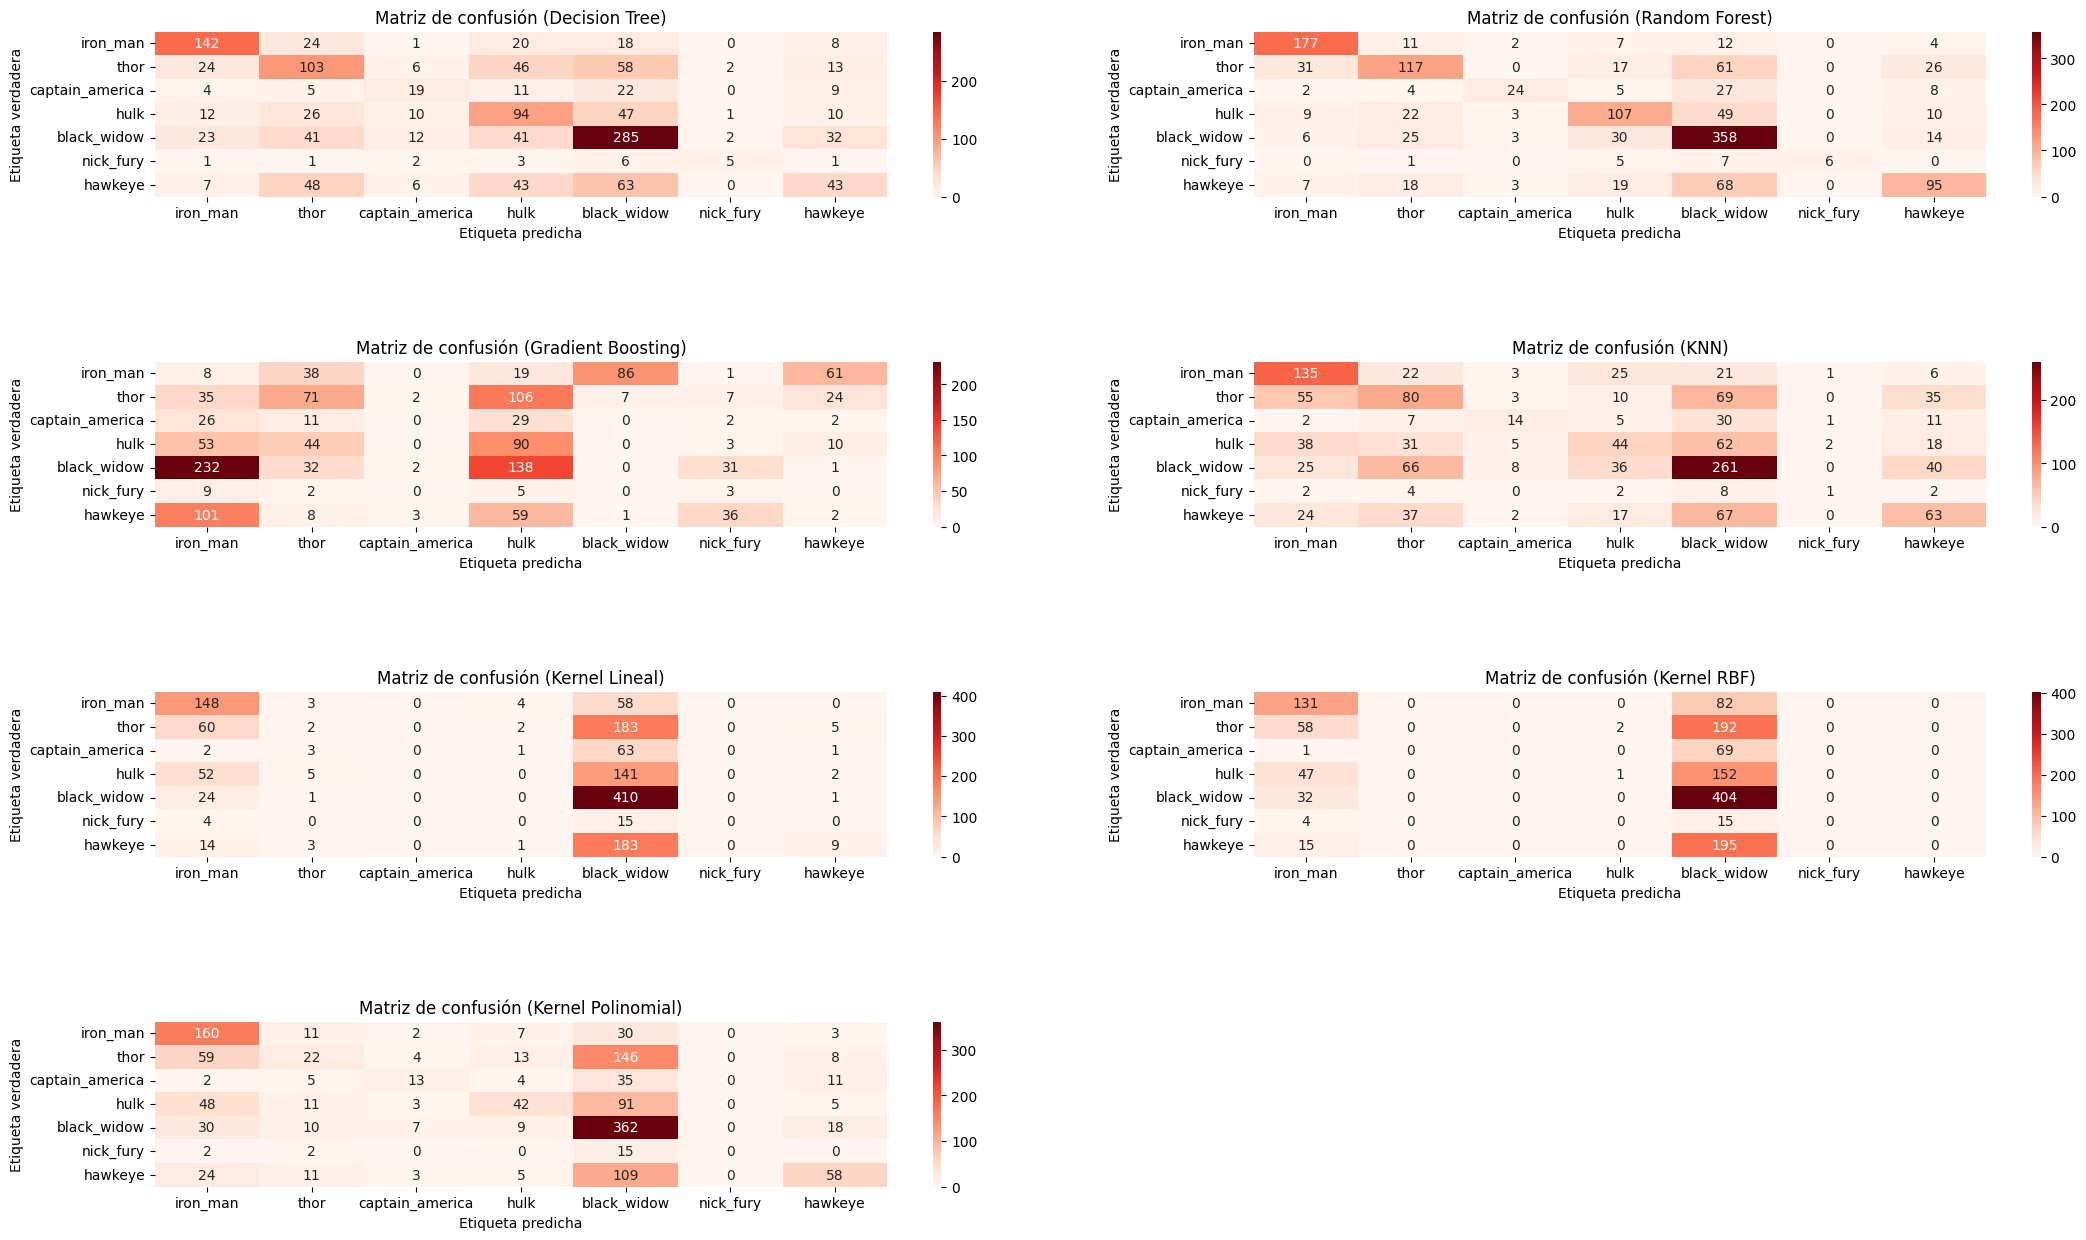

In [39]:
labels_mapping = {0: "iron_man", 1: "thor", 2: "captain_america", 3: "hulk", 4: "black_widow", 5: "nick_fury", 6: "hawkeye"}

LESS = 0
y_pred_gradient_names = []
for x in y_pred_gradient:
  rounded_x = round(x)
  if rounded_x <= -1:
    rounded_x = 0
  if rounded_x > 6:
    rounded_x = 6
  name = labels_mapping[rounded_x]
  y_pred_gradient_names.append(name)

cm_tree = confusion_matrix(y_test, y_pred_tree)
cm_forest = confusion_matrix(y_test, y_pred_forest)
cm_gradient = confusion_matrix(y_test, y_pred_gradient_names)
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_linear = confusion_matrix(y_test, y_pred_linear)
cm_rbf = confusion_matrix(y_test, y_pred_rbf)
cm_poly = confusion_matrix(y_test, y_pred_poly)

# Matrices de confusión
cms = [cm_tree, cm_forest, cm_gradient, cm_knn ,cm_linear, cm_rbf, cm_poly]
titles = ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'KNN', 'Kernel Lineal', 'Kernel RBF', 'Kernel Polinomial']

# Configuración del tamaño de la figura
plt.figure(figsize=(26, 15))

# Crear subplots para cada matriz de confusión
for i, cm in enumerate(cms):
    plt.subplot(4, 2, i+1)
    sns.heatmap(cm, annot=True, cmap="Reds", fmt="d", xticklabels=labels_mapping.values(), yticklabels=labels_mapping.values())
    plt.title("Matriz de confusión ({})".format(titles[i]))
    plt.xlabel("Etiqueta predicha")
    plt.ylabel("Etiqueta verdadera")

# Ajustar los subplots y mostrar la figura
plt.subplots_adjust(hspace=1)
plt.show()

Podemos ver que Nick Fury fue el avenger con el peor rendimiento, de hecho fue predecido correctamente una cantidad muy baja de las veces. Esto puede ser debido a la poca cantidad de datos que existían de él

In [40]:
print(f"La cantidad de imagenes de Nick Fury eran {len(avengers_directories['nick_fury']['found_landmarks'])}")

La cantidad de imagenes de Nick Fury eran 62


Con solamente 62 imagenes con sus landmarks correspondientes es evidente que el modelo no iba a poder clasificar a este avenger de manera correcta ya que no solo debió ser factor la poca cantidad de data si no que la luz, la correctitud de los landmarks, la posición del rostro, la diversidad de imagenes, el sobre ajuste, etc.

El avenger con mejor rendimiento podríamos decir que es Black Widow ya que es la que tiene mayor "True Positives"

In [41]:
print(f"La cantidad de imagenes de Black Widow eran {len(avengers_directories['black_widow']['found_landmarks'])}")

La cantidad de imagenes de Black Widow eran 740


Black Widow tenía una cantidad considerable de imagenes en comparación al avenger con peor rendimiento, pero aún así no era la con mayor data

Este avenger también parece ser el que más fue confundido. Esto puede deberse a que tenía imagenes mal clasificadas (cosa que se puede ver en el set de datos), sus facciones se parecía mucho a la del resto de los avengers o sus facciones no eran lo suficientemente significativas

Muchas veces fue confundida con Hawkeye, el cual tampoco tuvo un buen rendimiento. Esto puede significar que las caracteristicas escogidas no lograron diferenciar a este avenger

A partir de las matrices se observa el buen comportamiento del Random Forest, afirmando más las explicaciones del inciso pasado y también como la regresión fue casi aleatoria.


#Actividad 6

### Decision Tree

In [42]:
avengers_names = list(avengers_directories.keys())
features_names = list(X_train)

X_train_float = X_train.astype(float)
X_test_float = X_test.astype(float)

# Objeto lime explicador
explainer = lime.lime_tabular.LimeTabularExplainer(X_train_float.values, feature_names=features_names, class_names=avengers_names)

# Seleccionar una instancia de interés para interpretar
instance_idx = 20
instance = X_test_float.values[instance_idx]
true_class = y_test.values[instance_idx]

print(f"El avenger era {true_class}")

# Generar explicación con LIME
explanation = explainer.explain_instance(instance, clf.predict_proba, num_features=len(features_names))

# Imprimir y visualizar la explicación
explanation.show_in_notebook(show_table=True)

El avenger era black_widow


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


### Random Forest

In [43]:
# Seleccionar una instancia de interés para interpretar
instance_idx = 20
instance = X_test_float.values[instance_idx]
true_class = y_test.values[instance_idx]

print(f"El avenger era {true_class}")

# Generar explicación con LIME
explanation = explainer.explain_instance(instance, rfc.predict_proba, num_features=len(features_names))

# Imprimir y visualizar la explicación
explanation.show_in_notebook(show_table=True)

El avenger era black_widow


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


### KNN

In [44]:
# Seleccionar una instancia de interés para interpretar
instance_idx = 20
instance = X_test_float.values[instance_idx]
true_class = y_test.values[instance_idx]

print(f"El avenger era {true_class}")

# Generar explicación con LIME
explanation = explainer.explain_instance(instance, knn.predict_proba, num_features=len(features_names))

# Imprimir y visualizar la explicación
explanation.show_in_notebook(show_table=True)

El avenger era black_widow


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### Conclusiones

Viendo los datos anteriores podemos ver que nuestras caracteristicas parecieran no ser muy influyentes ya que nuestros modelos no aseguran que avenger es el que predice con mucha certeza y no existe como tal tampoco una caracteristica que logre caracterizar de manera muy influyente nuestra caracterización

Esto puede haber sido por varios factores:
  - Se debe replantear las características elegidas ya que pueden no ser las ideales
  - La cantidad de datos fue baja con respecto a lo necesario para poder haber ajustado las caracteristicas a cada clase
  - Los landmarks no fueron precisos por lo que las mediciones no siempre fueron correctas o las esperadas
  - Los datos (landmarks) tenían un parecido entre sí independiente de la clase por lo que era díficil diferenciarlas

#Bonus